In [1]:
# Necessary for importing modules from a sub-directory
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
if os.getcwd().split('/')[-1] == 'notebooks':
    print("CHANGE DIR TO ROOT")
    os.chdir(r"../")
    
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

CHANGE DIR TO ROOT


In [2]:
# NMF models 
dataset = f'DN10000'
d = f'metric_log/prod_noun_propn/{dataset}'

df_frob_cd = pd.read_csv(f'{d}/model=NMF_frobenius_cd_init-nndsvd_data=DN10000_ALL.csv')
df_frob_mu = pd.read_csv(f'{d}/model=NMF_frobenius_mu_init-nndsvda_data=DN10000_ALL.csv')
df_frob_mu_reg = pd.read_csv(f'{d}/model=NMF_frobenius_mu_init-nndsvda_alpha-1.5_L1-0.0_data=DN10000_ALL.csv')
df_kb_mu = pd.read_csv(f'{d}/model=NMF_kullback-leibler_mu_init-nndsvda_data=DN10000_ALL.csv')

df_frob_mu = pd.read_csv(f'{d}/model=NMF_frobenius_mu_init-nndsvda_data=DN10000_ALL.csv')


In [3]:
bytopics_df_frob_cd = df_frob_cd.groupby(['#topics']).mean()
bytopics_df_frob_mu = df_frob_mu.groupby(['#topics']).mean()
bytopics_df_frob_mu_reg = df_frob_mu_reg.groupby(['#topics']).mean()
bytopics_df_kb_mu = df_kb_mu.groupby(['#topics']).mean()

In [4]:
bytopics_df_kb_mu

,#articles,iterations,time,#features,cv_avg,cv_top,cv_bot,umass_avg,umass_top,umass_bot,rs_avg,rs_top,rs_bot
#topics,,,,,,,,,,,,,
10,50000,80,101.230,127510,0.5561,0.7305,0.3416,-1.9561,-1.4158,-2.6103,0.8058,1.0000,0.4391
20,50000,90,157.756,127510,0.6028,0.8311,0.3562,-2.2311,-1.4507,-3.4934,0.7565,1.0000,0.3886
30,50000,100,237.158,127510,0.5721,0.8703,0.2954,-2.3688,-1.4271,-4.4627,0.7230,0.9982,0.3614
40,50000,110,319.924,127510,0.5819,0.8899,0.2854,-2.6126,-1.4529,-6.0043,0.7080,0.9965,0.3465
50,50000,110,399.172,127510,0.5195,0.8654,0.2224,-2.8245,-1.4159,-5.6730,0.6955,0.9917,0.3357
60,50000,120,476.007,127510,0.5352,0.8676,0.2507,-2.8056,-1.3494,-6.8539,0.6797,0.9880,0.3221
70,50000,120,558.454,127510,0.5246,0.8507,0.2343,-3.0203,-1.3623,-7.1739,0.6718,0.9847,0.3150
80,50000,110,569.869,127510,0.5180,0.8307,0.2481,-2.9917,-1.4395,-6.8707,0.6671,0.9818,0.3105
90,50000,120,707.617,127510,0.5252,0.8447,0.2405,-2.8853,-1.4365,-6.5587,0.6600,0.9769,0.3072


In [5]:
## SET MODELS

# ----

# name = Frobenius CD 
# m    = bytopics_df_frob_cd

# name = Frobenius CD a=1
# m    = bytopics_df_frob_cd_a1

# name = Frobenius CD a=2
# m    = bytopics_df_frob_cd_a2

# name = Frobenius CD a=3
# m    = bytopics_df_frob_cd_a3

# -----

# name = Frobenius MU
# m    = bytopics_df_frob_mu

# name = Frobenius MU a=1
# m    = bytopics_df_frob_mu_a1

# name = Frobenius MU a=2
# m    = bytopics_df_frob_mu_a2

# name = Frobenius MU a=3
# m    = bytopics_df_frob_mu_a3

# ----

# name = Kullback-Leibler MU  
# m    = bytopics_df_kb_mu

# name = Frobenius MU nndsvd 
# m    = bytopics_df_frob_mu_nndsvd



# -----
m1_name = 'Frobenius CD'
m1 = bytopics_df_frob_cd

m2_name = 'Frobenius MU'
m2 = bytopics_df_frob_mu

m3_name = 'Frobenius MU a=1.5'
m3 = bytopics_df_frob_mu_reg

m4_name = 'Kullback-Leibler MU'
m4 = bytopics_df_kb_mu

PLOT_FILENAME = 'var/plots/top_4_TEST.png'

In [6]:
## SET PARAMS

x = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150]

# m1
if m1 is not None:
    m1_cv_avg = m1['cv_avg']
    m1_cv_bot = m1['cv_bot']
    m1_umass_avg = m1['umass_avg']
    m1_umass_bot = m1['umass_bot']
    m1_rs_avg = m1['rs_avg']
    m1_rs_bot = m1['rs_bot']
    
# m2
if m2 is not None:
    m2_cv_avg = m2['cv_avg']
    m2_cv_bot = m2['cv_bot']
    m2_umass_avg = m2['umass_avg']
    m2_umass_bot = m2['umass_bot']
    m2_rs_avg = m2['rs_avg']
    m2_rs_bot = m2['rs_bot']

    
# m3
if m3 is not None:
    m3_cv_avg = m3['cv_avg']
    m3_cv_bot = m3['cv_bot']
    m3_umass_avg = m3['umass_avg']
    m3_umass_bot = m3['umass_bot']
    m3_rs_avg = m3['rs_avg']
    m3_rs_bot = m3['rs_bot']
    
# m4
if m4 is not None:
    m4_cv_avg = m4['cv_avg']
    m4_cv_bot = m4['cv_bot']
    m4_umass_avg = m4['umass_avg']
    m4_umass_bot = m4['umass_bot']
    m4_rs_avg = m4['rs_avg']
    m4_rs_bot = m4['rs_bot']

In [7]:
sns.set_theme(style="darkgrid")
plt.rcParams['figure.figsize'] = [12, 4]
plt.rcParams['figure.dpi'] = 200
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams["font.family"] = "DejaVu Sans"

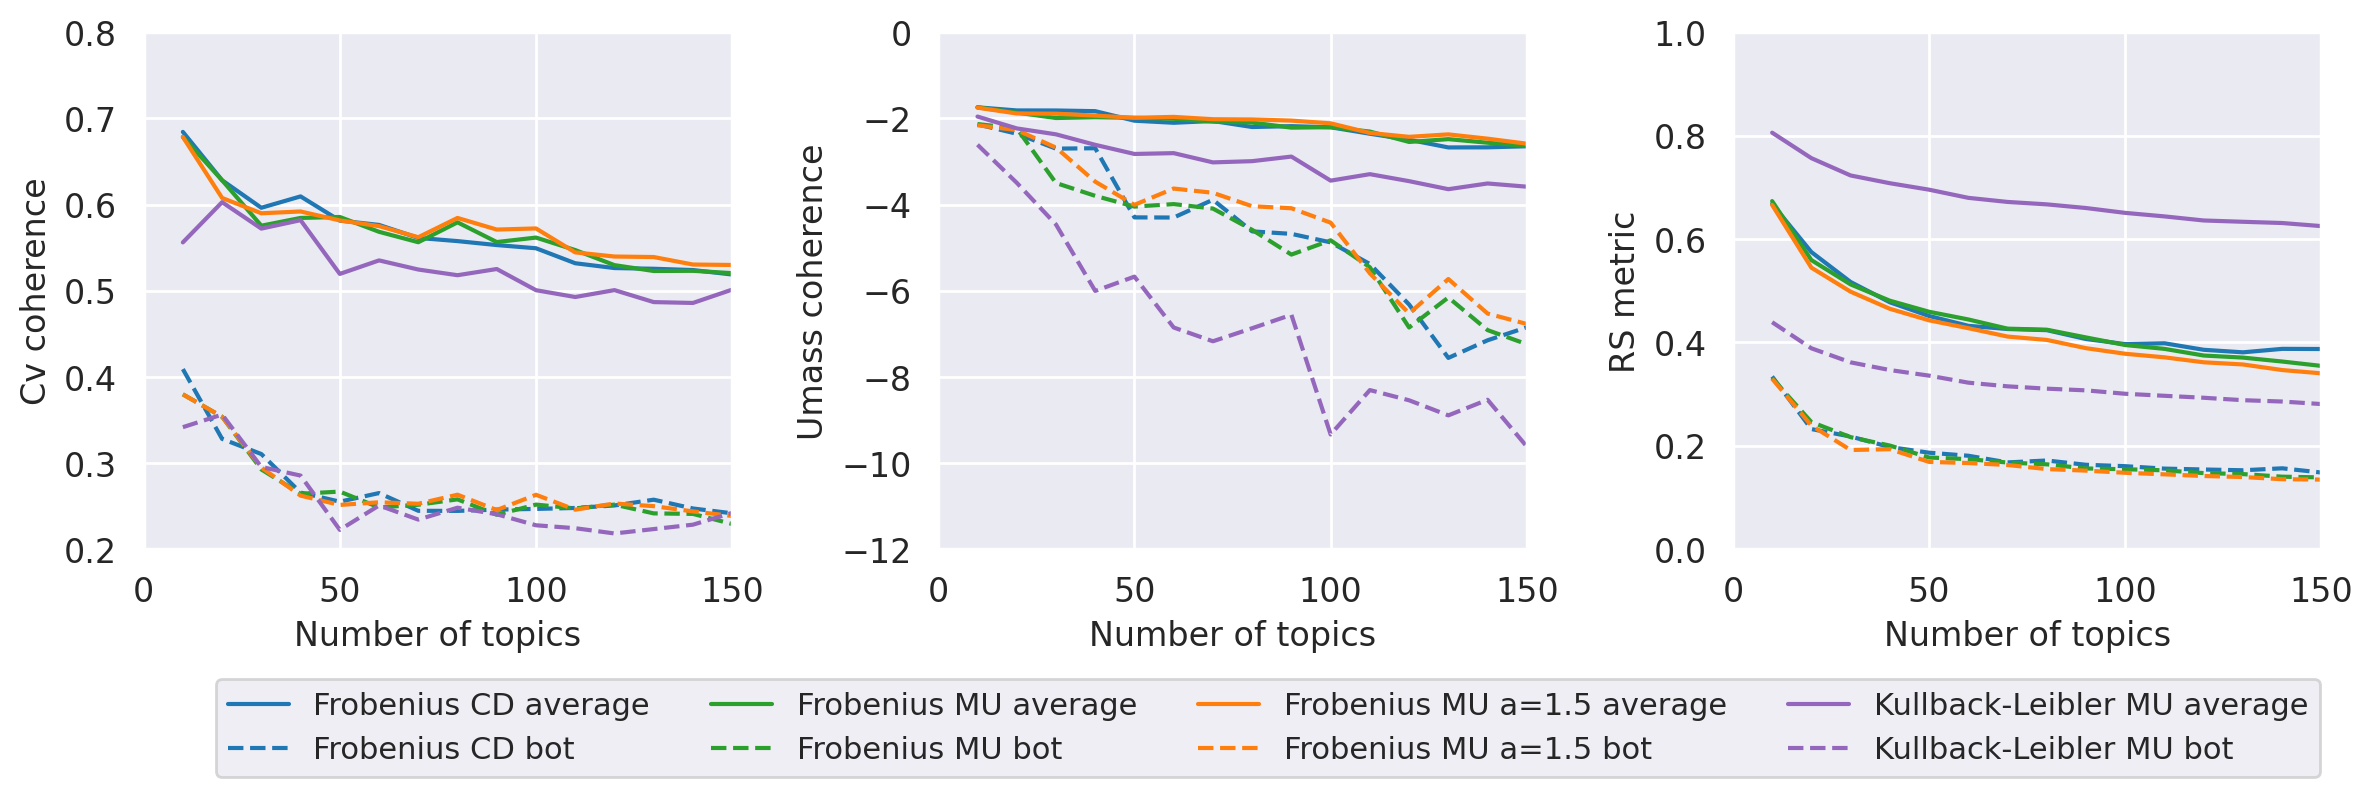

In [9]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, nrows=1)
ax1.set(ylim=(0.2, 0.8))
ax2.set(ylim=(-12, 0))
ax3.set(ylim=(0, 1.0))
ax1.set(xlim=(0, 150))
ax2.set(xlim=(0, 150))
ax3.set(xlim=(0, 150))
# m1
if m1 is not None:
    # Cv
    ax1.plot(x, m1_cv_avg, color='tab:blue', label = f"{m1_name} average")
    ax1.plot(x, m1_cv_bot, color='tab:blue', linestyle='dashed', label = f"{m1_name} bot")
    
    # Umass
    ax2.plot(x, m1_umass_avg, color='tab:blue', label = f"{m1_name} average")
    ax2.plot(x, m1_umass_bot, color='tab:blue', linestyle='dashed', label = f"{m1_name} bot")
    
    # RS
    ax3.plot(x, m1_rs_avg, color='tab:blue', label = f"{m1_name} average")
    ax3.plot(x, m1_rs_bot, color='tab:blue', linestyle='dashed', label = f"{m1_name} bot")
    
# m2
if m2 is not None:
    # Cv
    ax1.plot(x, m2_cv_avg, color='tab:green', label = f"{m2_name} average")
    ax1.plot(x, m2_cv_bot, color='tab:green', linestyle='dashed', label = f"{m2_name} bot")
    
    # Umass
    ax2.plot(x, m2_umass_avg, color='tab:green', label = f"{m2_name} average")
    ax2.plot(x, m2_umass_bot, color='tab:green', linestyle='dashed', label = f"{m2_name} bot")
    
    # RS
    ax3.plot(x, m2_rs_avg, color='tab:green', label = f"{m2_name} average")
    ax3.plot(x, m2_rs_bot, color='tab:green', linestyle='dashed', label = f"{m2_name} bot")
    
# m3
if m3 is not None:
    # Cv
    ax1.plot(x, m3_cv_avg, color='tab:orange', label = f"{m3_name} average")
    ax1.plot(x, m3_cv_bot, color='tab:orange', linestyle='dashed', label = f"{m3_name} bot")
    
    # Umass
    ax2.plot(x, m3_umass_avg, color='tab:orange', label = f"{m3_name} average")
    ax2.plot(x, m3_umass_bot, color='tab:orange', linestyle='dashed', label = f"{m3_name} bot")
    
    # RS
    ax3.plot(x, m3_rs_avg, color='tab:orange', label = f"{m3_name} average")
    ax3.plot(x, m3_rs_bot, color='tab:orange', linestyle='dashed', label = f"{m3_name} bot")

# m4
if m4 is not None:
    # Cv
    ax1.plot(x, m4_cv_avg, color='tab:purple', label = f"{m4_name} average")
    ax1.plot(x, m4_cv_bot, color='tab:purple', linestyle='dashed', label = f"{m4_name} bot")
    
    # Umass
    ax2.plot(x, m4_umass_avg, color='tab:purple', label = f"{m4_name} average")
    ax2.plot(x, m4_umass_bot, color='tab:purple', linestyle='dashed', label = f"{m4_name} bot")
    
    # RS
    ax3.plot(x, m4_rs_avg, color='tab:purple', label = f"{m4_name} average")
    ax3.plot(x, m4_rs_bot, color='tab:purple', linestyle='dashed', label = f"{m4_name} bot")

# ---
ax1.set_xlabel('Number of topics')
ax1.set_ylabel('Cv coherence')

ax2.set_xlabel('Number of topics')
ax2.set_ylabel('Umass coherence')

ax3.set_xlabel('Number of topics')
ax3.set_ylabel('RS metric')

fig.tight_layout(pad=1.0)
ax3.legend(bbox_to_anchor=(0,-0.5,1.05,0), loc="lower right", borderaxespad=1, ncol=4)
plt.rcParams['figure.figsize'] = [12, 3.5]
plt.savefig(PLOT_FILENAME)
plt.show()